# 2주차 실습 

## CSV 파일 불러오기

In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


In [4]:
# 1. titanic.csv 파일 저장 경로 입력 후 데이터 로딩
file_path = 'C://Users//Chick//AI-class//titanic.csv'  
df = pd.read_csv(file_path)

In [5]:
# 데이터 확인
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0.5, 1.0, 'Survived or Not')

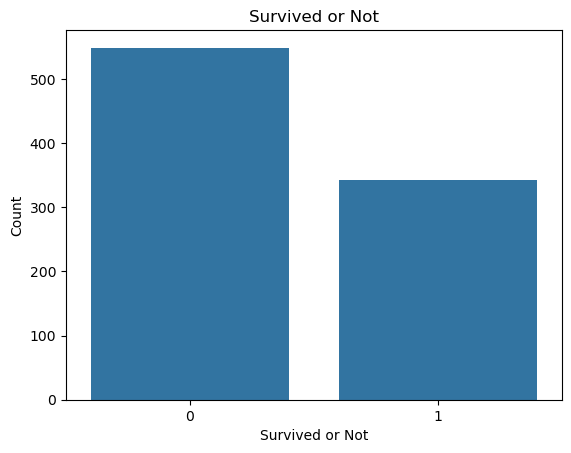

In [6]:
# 레이블 개수 확인(그래프)
sns.countplot(data = df, x="Survived")
plt.xlabel("Survived or Not")
plt.ylabel("Count")
plt.title("Survived or Not")


In [7]:
# 레이블 갯수 확인 (숫자)
df['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

In [8]:
# 2. 결측치 확인
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
# 3. Age의 결측치를 평균나이로 대체
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)


In [11]:
# 3-2. Cabin 컬럼의 결측치를 'Unknown'으로 채우기
df['Cabin'] = df['Cabin'].fillna('Unknown')


In [12]:
# 4. label 확인
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [13]:
# 5. 필요없는 컬럼 삭제
df = df.drop(columns=['PassengerId', 'Name','Ticket','Embarked'], axis=1)

In [14]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,male,22.000000,1,0,7.2500,Unknown
1,1,1,female,38.000000,1,0,71.2833,C85
2,1,3,female,26.000000,0,0,7.9250,Unknown
3,1,1,female,35.000000,1,0,53.1000,C123
4,0,3,male,35.000000,0,0,8.0500,Unknown
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,Unknown
887,1,1,female,19.000000,0,0,30.0000,B42
888,0,3,female,29.699118,1,2,23.4500,Unknown
889,1,1,male,26.000000,0,0,30.0000,C148


In [15]:
# 6. 엔코딩(숫자) 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Cabin'] = le.fit_transform(df['Cabin'])
df['Sex'] = le.fit_transform(df['Sex'])


In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,1,22.0,1,0,7.2500,147
1,1,1,0,38.0,1,0,71.2833,81
2,1,3,0,26.0,0,0,7.9250,147
3,1,1,0,35.0,1,0,53.1000,55
4,0,3,1,35.0,0,0,8.0500,147


In [17]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [19]:
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_test.unique(), yticklabels=y_test.unique())
    plt.title(f"{model_name} Confusion Maxtrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [20]:
# 데이터 분할
X = df.drop('Survived', axis=1)
y = df['Survived']


In [21]:
# 훈련데이터와 테스트데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# StandardScaler를 사용해 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Decision Tree 결과:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       105
           1       0.73      0.70      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



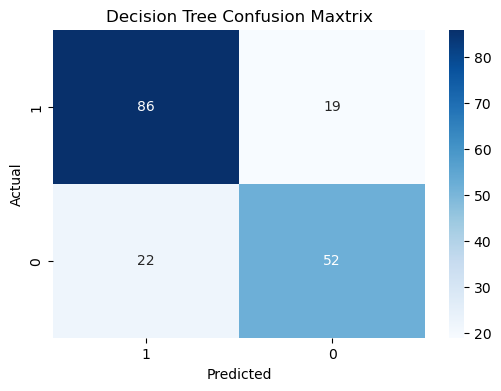

In [23]:
# Decision Tree 모델
dt_model = DecisionTreeClassifier(random_state=42) # Decision Tree 분류기 객체 생성
dt_model.fit(X_train, y_train) # 학습 데이터를 사용해 모델 훈련
dt_pred = dt_model.predict(X_test) # 테스트 데이터에 대한 예측 수행

# 예측 및 정확도 계산
print("Decision Tree 결과:\n", classification_report(y_test, dt_pred)) # Decision Tree 모델의 성능평가
plot_confusion_matrix(y_test, dt_pred, "Decision Tree") # Confusion Matrix를 시각화하여 예측 정확도 확인

Logistic Regression 결과:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       105
           1       0.73      0.70      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



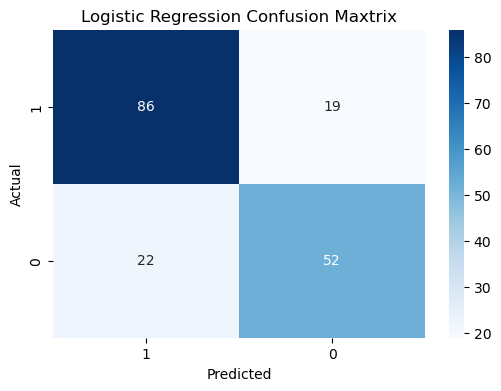

In [24]:
# Logistic Regression 모델
lr_model = LogisticRegression(max_iter=200) # Logistic Regression 분류기 객체 생성
lr_model.fit(X_train, y_train) # 학습 데이터를 사용해 모델 훈련
lr_pred = lr_model.predict(X_test) # 테스트 데이터에 대한 예측 수행

print("Logistic Regression 결과:\n", classification_report(y_test, dt_pred)) # Logistic Regression 모델의 성능 평가
plot_confusion_matrix(y_test, dt_pred, "Logistic Regression") # Confusion Matrix을 시각화하여 예측 정확도 확인

Support Vector Classifier 결과:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       105
           1       0.73      0.70      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



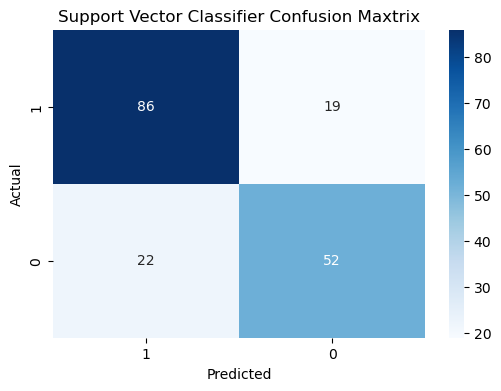

In [25]:
# Support Vector Classifier 모델
svc_model = SVC() # Support Vector Classifier 분류기 객체 생성
svc_model.fit(X_train, y_train) # 학습 데이터를 사용해 모델 훈련
svc_pred = svc_model.predict(X_test) # 테스트 데이터에 대한 예측 수행
print("Support Vector Classifier 결과:\n", classification_report(y_test, dt_pred)) # Support Vector Classifier 모델의 성능 평가  
plot_confusion_matrix(y_test, dt_pred, "Support Vector Classifier") # Confusion Matrix을 시각화하여 예측 정확도 확인

Rancom Forest 결과:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       105
           1       0.73      0.70      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



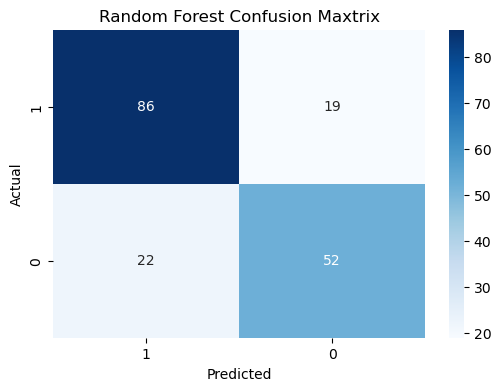

In [26]:
# Random Forest 모델
rf_model = RandomForestClassifier() # Random Forest 분류기 객체 생성
rf_model.fit(X_train, y_train) # 학습 데이터를 활용해 모델 훈련
rf_pred = rf_model.predict(X_test) # 테스트 데이터에 대한 예측을 수행

print("Rancom Forest 결과:\n", classification_report(y_test, dt_pred)) #Random Forest 모델의 성능 평가(classification_report 출력)
plot_confusion_matrix(y_test, dt_pred, "Random Forest") # Confusion Maxtrix를 시각화하여 예측 정확도 확인

K-Nearest Neighbors 결과:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       105
           1       0.73      0.70      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



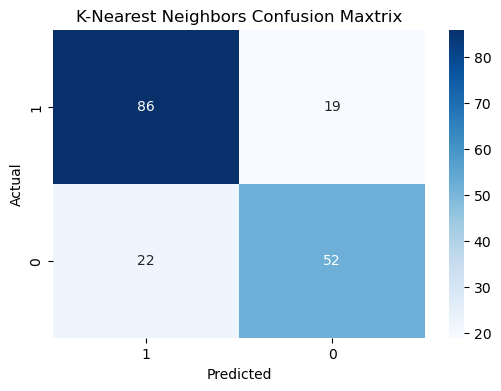

In [27]:
# K-Nearest Neighbors 모델
knn_model = KNeighborsClassifier()  # K-Nearest Neighbors 분류기 객체 생성
knn_model.fit(X_train, y_train)  # 학습 데이터를 사용해 모델 훈련
knn_pred = knn_model.predict(X_test)  # 테스트 데이터에 대한 예측 수행

print("K-Nearest Neighbors 결과:\n", classification_report(y_test, dt_pred)) #Random Forest 모델의 성능 평가(classification_report 출력)
plot_confusion_matrix(y_test, dt_pred, "K-Nearest Neighbors") # Confusion Maxtrix를 시각화하여 예측 정확도 확인